In this task we will experiment with LLM tokenizers to better understand their properties and restrictions.

# Part 1. Exploring OpeAI tokenizer

Let's start with OpenAI tokenizers. To use them, we need to install the `tiktoken` library:

In [72]:
import numpy as np

In [34]:
!pip install tiktoken

Now, we can load the tokenizer of a specific model with `tiktoken.encoding_for_model`. Its argument is a single string - a model code you can find on [this page](https://platform.openai.com/docs/models/engines). As an example, let's load the tokenizer of GPT-4o:



In [35]:
import tiktoken

encoding = tiktoken.encoding_for_model('gpt-4o')

Now, we can use:

- `encoding.encode` to tokenize ("encode") a string as a sequence of token indices,
- `encoding.decode` to decode a sequence of token indices back into a string.

**A word of caution!** The terminology here may be confusing. The word "encoding" is used in this context as a synonym of *tokenization* and the word "decoding" as a synonym of *detokenization* (a process reverse to tokenization). But in other situations "encoding" would mean "mapping tokens into their vector embeddings" or even "mapping a whole sequence into a vector".

Let's look at an example:

In [36]:
initial_string = '12345678 my own'

# Tokenization
encoded_string = encoding.encode(initial_string)
print('After tokenization (encoded string): ', encoded_string)

# Decoding a list of token indices back into a string:
decoded_string = encoding.decode(encoded_string)
print('String decoded back from the list of token indices:', decoded_string)

After tokenization (encoded string):  [7633, 19354, 4388, 922, 2316]
String decoded back from the list of token indices: 12345678 my own


As you see, the string `'12345678'` was split into three tokens with indices 7633, 19354, and 4388. You're probably curious to learn to which subword units these tokens correspond. Let's check it:

In [37]:
print([encoding.decode([t]) for t in range(1000)])

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '�', '\x00', '\x01', '\x02', '\x03', '\x04', '\x05', '\x06', '\

In [38]:
print([encoding.decode([t]) for t in encoding.encode('12345678')])

['123', '456', '78']


So:
- the token number 7633 is `'123'`,
- the token number 19354 is `'456'`,
- the token number 4388 is `'78'`.

**Task 1**. Enter the list of subword units into which the string `'87654321'` is split by the tokenizer.

Your input should be a sequence of strings separated by commas, like this:
```'8765','4321'```


In [39]:
tokens = encoding.encode('87654321')
[encoding.decode([t]) for t in tokens]

['876', '543', '21']

Now it's probably a little less surprising for you that LLMs are not too good at sequence reversal ('87654321' <-> '12345678') or arithmetics. Tokenization is not aligned at all with such operations.

**Task 2**. Print the subword unit (a string) corresponding to the token index 10101. The answer should be a single string, such as: ```'ans'```

Food for thought:
Try to guess why do we have this strange string among tokens. It should have been quite frequent in the training data to appear as a token.

In [40]:
encoding.decode([10101])

'/**'

Now, let's check the vocabulary size of GPT-4o. Web search can quickly give us the number 200k, but we want to be sure.

If we explore the `encoding` object a bit more deeply, we will find:

- `encoding._mergeable_ranks` contains regular `token:index` dictionary; its size is 199998.
- `encoding._special_tokens` contains two special tokens:

In [41]:
encoding.max_token_value

200018

In [46]:
encoding._special_tokens

{'<|endoftext|>': 199999, '<|endofprompt|>': 200018}

In [49]:
max(encoding._mergeable_ranks.values())

199997

So, indeed we have 200k items in the dictionary.

**Task 3**. In this task, we will calculate the price of a particular OpenAI API call using what we've learnt about tokenizers.

We'll imagine that we asked GPT-4o to summarize the body of the [wikipedia article about the French painter Jacques-Louis David](https://en.wikipedia.org/wiki/Jacques-Louis_David) and that GPT-4o provided us the paper's intro as a summary:



In [50]:
intro = '''
Jacques-Louis David (French: [ʒaklwi david]; 30 August 1748 – 29 December 1825) was a French painter in the Neoclassical style, considered to be the preeminent painter of the era. In the 1780s, his cerebral brand of history painting marked a change in taste away from Rococo frivolity toward classical austerity, severity, and heightened feeling, which harmonized with the moral climate of the final years of the Ancien Régime.\nDavid later became an active supporter of the French Revolution and friend of Maximilien Robespierre (1758–1794), and was effectively a dictator of the arts under the French Republic. Imprisoned after Robespierre\'s fall from power, he aligned himself with yet another political regime upon his release: that of Napoleon, the First Consul of France. At this time he developed his Empire style, notable for its use of warm Venetian colours. After Napoleon\'s fall from Imperial power and the Bourbon revival, David exiled himself to Brussels, then in the United Kingdom of the Netherlands, where he remained until his death. David had many pupils, making him the strongest influence in French art of the early 19th century, especially academic Salon painting
'''

main_text = '''
Jacques-Louis David was born into a prosperous French family in Paris on 30 August 1748. When he was about nine his father was killed in a duel and his mother left him with his well-off architect uncles. They saw to it that he received an excellent education at the Collège des Quatre-Nations, University of Paris, but he was never a good student—he had a facial tumor that impeded his speech, and he was always preoccupied with drawing. He covered his notebooks with drawings, and he once said, "I was always hiding behind the instructor's chair, drawing for the duration of the class". Soon, he desired to be a painter, but his uncles and mother wanted him to be an architect. He overcame the opposition, and went to learn from François Boucher (1703–1770), the leading painter of the time, who was also a distant relative. Boucher was a Rococo painter, but tastes were changing, and the fashion for Rococo was giving way to a more classical style. Boucher decided that instead of taking over David's tutelage, he would send David to his friend, Joseph-Marie Vien (1716–1809), a painter who embraced the classical reaction to Rococo. There, David attended the Royal Academy, based in what is now the Louvre.

Each year the Academy awarded an outstanding student the prestigious Prix de Rome, which funded a 3- to 5-year stay in Rome. Since artists were now revisiting classical styles, the trip provided its winners the opportunity to study the remains of classical antiquity and the works of the Italian Renaissance masters at first hand. Called pensionnaire they were housed in the French Academy's Rome outpost, which from the years 1737 to 1793 was the Palazzo Mancini in the Via del Corso. David made three consecutive attempts to win the annual prize, (with Minerva Fighting Mars, Diana and Apollo Killing Niobe's Children and The Death of Seneca) with each failure allegedly contributing to his lifelong grudge against the institution. After his second loss in 1772, David went on a hunger strike, which lasted two and a half days before the faculty encouraged him to continue painting. Confident he now had the support and backing needed to win the prize, he resumed his studies with great zeal—only to fail to win the Prix de Rome again the following year. Finally, in 1774, David was awarded the Prix de Rome on the strength of his painting of Erasistratus Discovering the Cause of Antiochus' Disease, a subject set by the judges. In October 1775 he made the journey to Italy with his mentor, Joseph-Marie Vien, who had just been appointed director of the French Academy at Rome.
While in Italy, David mostly studied the works of 17th-century masters such as Poussin, Caravaggio, and the Carracci. Although he declared, "the Antique will not seduce me, it lacks animation, it does not move", David filled twelve sketchbooks with drawings that he and his studio used as model books for the rest of his life. He was introduced to the painter Raphael Mengs (1728–1779), who opposed the Rococo tendency to sweeten and trivialize ancient subjects, advocating instead the rigorous study of classical sources and close adherence to ancient models. Mengs' principled, historicizing approach to the representation of classical subjects profoundly influenced David's pre-revolutionary painting, such as The Vestal Virgin, probably from the 1780s. Mengs also introduced David to the theoretical writings on ancient sculpture by Johann Joachim Winckelmann (1717–1768), the German scholar held to be the founder of modern art history. As part of the Prix de Rome, David toured the newly excavated ruins of Pompeii in 1779, which deepened his belief that the persistence of classical culture was an index of its eternal conceptual and formal power. During the trip David also assiduously studied the High Renaissance painters, Raphael making a profound and lasting impression on the young French artist.

Although David's fellow students at the academy found him difficult to get along with, they recognized his genius. David's stay at the French Academy in Rome was extended by a year. In July 1780, he returned to Paris. There, he found people ready to use their influence for him, and he was made an official member of the Royal Academy. He sent the Academy two paintings, and both were included in the Salon of 1781, a high honor. He was praised by his famous contemporary painters, but the administration of the Royal Academy was very hostile to this young upstart. After the Salon, the King granted David lodging in the Louvre, an ancient and much desired privilege of great artists. When the contractor of the King's buildings, M. Pécoul, was arranging with David, he asked the artist to marry his daughter, Marguerite Charlotte. This marriage brought him money and eventually four children. David had about 50 of his own pupils and was commissioned by the government to paint "Horace defended by his Father", but he soon decided, "Only in Rome can I paint Romans." His father-in-law provided the money he needed for the trip, and David headed for Rome with his wife, Charlotte, and three of his students, one of whom, Jean-Germain Drouais (1763–1788), was the Prix de Rome winner of that year.

In Rome, David painted his famous Oath of the Horatii, 1784. In this piece, the artist references Enlightenment values while alluding to Rousseau's social contract. The republican ideal of the general became the central focus of the painting with all three sons positioned in compliance with the father. The Oath between the characters can be read as an act of unification of men to the binding of the state. The issue of gender roles also becomes apparent in this piece, as the women in Horatii greatly contrast the group of brothers. David depicts the father with his back to the women, shutting them out of the oath. They also appear to be smaller in scale and physically isolated from the male figures. The masculine virility and discipline displayed by the men's rigid and confident stances is also severely contrasted to the slouching, swooning female softness created in the other half of the composition. Here we see the clear division of male-female attributes that confined the sexes to specific roles under Rousseau's popularized doctrine of "separate spheres".
These revolutionary ideals are also apparent in the Distribution of Eagles. While Oath of the Horatii and The Tennis Court Oath stress the importance of masculine self-sacrifice for one's country and patriotism, the Distribution of Eagles would ask for self-sacrifice for one's Emperor (Napoleon) and the importance of battlefield glory.

In 1787, David did not become the Director of the French Academy in Rome, which was a position he wanted dearly. The Count in charge of the appointments said David was too young, but said he would support him in 6 to 12 years. This situation would be one of many that would cause him to lash out at the Academy in years to come.
For the Salon of 1787, David exhibited his famous Death of Socrates. "Condemned to death, Socrates, strong, calm and at peace, discusses the immortality of the soul. Surrounded by Crito, his grieving friends and students, he is teaching, philosophizing, and in fact, thanking the God of Health, Asclepius, for the hemlock brew which will ensure a peaceful death... The wife of Socrates can be seen grieving alone outside the chamber, dismissed for her weakness. Plato is depicted as an old man seated at the end of the bed." Critics compared the Socrates with Michelangelo's Sistine Ceiling and Raphael's Stanze, and one, after ten visits to the Salon, described it as "in every sense perfect". Denis Diderot said it looked as if he copied it from some ancient bas-relief. The painting was very much in tune with the political climate at the time. For this painting, David was not honored by a royal "works of encouragement".

For his next painting, David created The Lictors Bring to Brutus the Bodies of His Sons. The work had tremendous appeal for the time. Before the opening of the Salon, the French Revolution had begun. The National Assembly had been established, and the Bastille had fallen. The royal court did not want propaganda agitating the people, so all paintings had to be checked before being hung. David's portrait of Lavoisier, who was a chemist and physicist as well as an active member of the Jacobin party, was banned by the authorities for such reasons. When the newspapers reported that the government had not allowed the showing of The Lictors Bring to Brutus the Bodies of His Sons, the people were outraged, and the royals were forced to give in. The painting was hung in the exhibition, protected by art students. The painting depicts Lucius Junius Brutus, the Roman leader, grieving for his sons. Brutus's sons had attempted to overthrow the government and restore the monarchy, so the father ordered their death to maintain the republic. Brutus was the heroic defender of the republic, sacrificing his own family for the good of the republic. On the right, the mother holds her two daughters, and the nurse is seen on the far right, in anguish. Brutus sits on the left, alone, brooding, seemingly dismissing the dead bodies of his sons. Knowing what he did was best for his country, but the tense posture of his feet and toes reveals his inner turmoil. The whole painting was a Republican symbol, and obviously had immense meaning during these times in France. It exemplified civic virtue, a value highly regarded during the Revolution.

In the beginning, David was a supporter of the Revolution, a friend of Robespierre, and a member of the Jacobin Club. While others were leaving the country for new and greater opportunities, David stayed behind to help destroy the old order; he was a regicide who voted in the National Convention for the Execution of Louis XVI. It is uncertain why he did this, as there were many more opportunities for him under the King than the new order; some people suggest David's love for the classical made him embrace everything about that period, including a republican government.
Others believed that they found the key to the artist's revolutionary career in his personality. Undoubtedly, David's artistic sensibility, mercurial temperament, volatile emotions, ardent enthusiasm, and fierce independence might have been expected to help turn him against the established order but they did not fully explain his devotion to the republican regime. Nor did the vague statements of those who insisted upon his "powerful ambition...and unusual energy of will" actually account for his revolutionary connections. Those who knew him maintained that "generous ardor", high-minded idealism and well-meaning though sometimes fanatical enthusiasm, rather than opportunism and jealousy, motivated his activities during this period.
Soon, David turned his critical sights on the Royal Academy of Painting and Sculpture. This attack was probably caused primarily by the hypocrisy of the organization and their personal opposition to his work, as seen in previous episodes in David's life. The Royal Academy was controlled by royalists, who opposed David's attempts at reform; so the National Assembly finally ordered it to make changes to conform to the new constitution.
David then began work on something that would later hound him: propaganda for the new republic. David's painting of Brutus was shown during the play Brutus by Voltaire.
In 1789, Jacques-Louis David attempted to leave his artistic mark on the historical beginnings of the French Revolution with his painting of The Oath of the Tennis Court. David undertook this task not out of personal political conviction but rather because he was commissioned to do so. The painting was meant to commemorate the event of the same name but was never completed. A meeting of the Estates General was convened in May to address reforms of the monarchy. Dissent arose over whether the three estates would meet separately, as had been tradition, or as one body. The King's acquiescence in the demands of the upper orders led to the deputies of the Third Estate renaming themselves as the National Assembly on 17 June. They were locked out of the meeting hall three days later when they attempted to meet, and forced to reconvene to the royal indoor tennis court. Presided over by Jean-Sylvain Bailly, they made a 'solemn oath never to separate' until a national constitution had been created. In 1789 this event was seen as a symbol of the national unity against the ancien regime. Rejecting the current conditions, the oath signified a new transition in human history and ideology. David was enlisted by the Society of Friends of the Constitution, the body that would eventually form the Jacobins, to enshrine this symbolic event.
This instance is notable in more ways than one because it eventually led David to finally become involved in politics as he joined the Jacobins. The picture was meant to be massive in scale; the figures in the foreground were to be life-sized portraits of the counterparts, including Jean-Sylvain Bailly, the President of the Constituent Assembly. Seeking additional funding, David turned to the Society of Friends of the Constitution. The funding for the project was to come from over three thousand subscribers hoping to receive a print of the image. However, when the funding was insufficient, the state ended up financing the project.
David set out in 1790 to transform the contemporary event into a major historical picture which would appear at the Salon of 1791 as a large pen-and-ink drawing. As in the Oath of the Horatii, David represents the unity of men in the service of a patriotic ideal. The outstretched arms which are prominent in both works betray David's deeply held belief that acts of republican virtue akin to those of the Romans were being played out in France. In what was essentially an act of intellect and reason, David creates an air of drama in this work. The very power of the people appears to be "blowing" through the scene with the stormy weather, in a sense alluding to the storm that would be the revolution.
Symbolism in this work of art closely represents the revolutionary events taking place at the time. The figure in the middle is raising his right arm making the oath that they will never disband until they have reached their goal of creating a "constitution of the realm fixed upon solid foundations". The importance of this symbol is highlighted by the fact that the crowd's arms are angled to his hand forming a triangular shape. Additionally, the open space in the top half contrasted to the commotion in the lower half serves to emphasize the magnitude of the Tennis Court Oath.

In his attempt to depict political events of the Revolution in "real time", David was venturing down a new and untrodden path in the art world. However, Thomas Crow argues that this path "proved to be less a way forward than a cul-de-sac for history painting". Essentially, the history of the demise of David's The Tennis Court Oath illustrates the difficulty of creating works of art that portray current and controversial political occurrences. Political circumstances in France proved too volatile to allow the completion of the painting. The unity that was to be symbolized in The Tennis Court Oath no longer existed in radicalized 1792. The National Assembly had split between conservatives and radical Jacobins, both vying for political power. By 1792 there was no longer consensus that all the revolutionaries at the tennis court were "heroes". A sizeable number of the heroes of 1789 had become the villains of 1792. In this unstable political climate David's work remained unfinished. With only a few nude figures sketched onto the massive canvas, David abandoned The Oath of the Tennis Court. To have completed it would have been politically unsound. After this incident, when David attempted to make a political statement in his paintings, he returned to the less politically charged use of metaphor to convey his message.
When Voltaire died in 1778, the church denied him a church burial, and his body was interred near a monastery. A year later, Voltaire's old friends began a campaign to have his body buried in the Panthéon, as church property had been confiscated by the French Government. In 1791, David was appointed to head the organizing committee for the ceremony, a parade through the streets of Paris to the Panthéon. Despite rain and opposition from conservatives due to the amount of money spent, the procession went ahead. Up to 100,000 people watched the "Father of the Revolution" being carried to his resting place. This was the first of many large festivals organized by David for the republic. He went on to organize festivals for martyrs that died fighting royalists. These funerals echoed the religious festivals of the pagan Greeks and Romans and are seen by many as Saturnalian.

David incorporated many revolutionary symbols into these theatrical performances and orchestrated ceremonial rituals, in effect radicalizing the applied arts themselves. The most popular symbol for which David was responsible as propaganda minister was drawn from classical Greek images; changing and transforming them with contemporary politics. In an elaborate festival held on the anniversary of the revolt that brought the monarchy to its knees, David's Hercules figure was revealed in a procession following the Goddess of Liberty (Marianne). Liberty, the symbol of Enlightenment ideals was here being overturned by the Hercules symbol; that of strength and passion for the protection of the Republic against disunity and factionalism. In his speech during the procession, David "explicitly emphasized the opposition between people and monarchy; Hercules was chosen, after all, to make this opposition more evident". The ideals that David linked to his Hercules single-handedly transformed the figure from a sign of the old regime into a powerful new symbol of revolution. "David turned him into the representation of a collective, popular power. He took one of the favorite signs of monarchy and reproduced, elevated, and monumentalized it into the sign of its opposite." Hercules, the image, became to the revolutionaries, something to rally around.
In June 1791, the King made an ill-fated attempt to flee the country, but was apprehended short of his goal on the Austrian Netherlands border and was forced to return under guard to Paris. Louis XVI had made secret requests to Emperor Leopold II of Austria, Marie-Antoinette's brother, to restore him to his throne. This was granted and Austria threatened France if the royal couple were hurt. In reaction, the people arrested the King. This led to an Invasion after the trials and execution of Louis and Marie-Antoinette. The Bourbon monarchy was destroyed by the French people in 1792—it would be restored after Napoleon, then destroyed again with the Restoration of the House of Bonaparte. When the new National Convention held its first meeting, David was sitting with his friends Jean-Paul Marat and Robespierre. In the convention, David soon earned the nickname "ferocious terrorist". Robespierre's agents discovered a secret vault containing the King's correspondence which proved he was trying to overthrow the government, and demanded his execution. The National Convention held the trial of Louis XVI; David voted for the death of the King, causing his wife, Marguerite Charlotte, a royalist, to divorce him.
When Louis XVI was executed on 21 January 1793, another man had already died as well—Louis Michel le Peletier de Saint-Fargeau. Le Peletier was killed on the preceding day by a royal bodyguard in revenge for having voted for the death of the King. David was called upon to organize a funeral, and he painted Le Peletier Assassinated. In it, the assassin's sword was seen hanging by a single strand of horsehair above Le Peletier's body, a concept inspired by the proverbial ancient tale of the sword of Damocles, which illustrated the insecurity of power and position. This underscored the courage displayed by Le Peletier and his companions in routing an oppressive king. The sword pierces a piece of paper on which is written "I vote the death of the tyrant", and as a tribute at the bottom right of the picture David placed the inscription "David to Le Peletier. 20 January 1793". The painting was later destroyed by Le Peletier's royalist daughter, and is known by only a drawing, an engraving, and contemporary accounts. Nevertheless, this work was important in David's career because it was the first completed painting of the French Revolution, made in less than three months, and a work through which he initiated the regeneration process that would continue with The Death of Marat, David's masterpiece.

On 13 July 1793, David's friend Marat was assassinated by Charlotte Corday with a knife she had hidden in her clothing. She gained entrance to Marat's house on the pretense of presenting him a list of people who should be executed as enemies of France. Marat thanked her and said that they would be guillotined next week upon which Corday immediately fatally stabbed him. She was guillotined shortly thereafter. Corday was of an opposing political party, whose name can be seen in the note Marat holds in David's subsequent painting, The Death of Marat. Marat, a member of the National Convention and a journalist, had a skin disease that caused him to itch horribly. The only relief he could get was in his bath over which he improvised a desk to write his list of suspect counter-revolutionaries who were to be quickly tried and, if convicted, guillotined. David once again organized a spectacular funeral, and Marat was buried in the Panthéon. Marat's body was to be placed upon a Roman bed, his wound displayed and his right arm extended holding the pen which he had used to defend the Republic and its people. This concept was to be complicated by the fact that the corpse had begun to putrefy. Marat's body had to be periodically sprinkled with water and vinegar as the public crowded to see his corpse prior to the funeral on 15 and 16 July. The stench became so bad however that the funeral had to be brought forward to the evening of 16 July.
The Death of Marat, perhaps David's most famous painting, has been called the Pietà of the revolution. Upon presenting the painting to the convention, he said "Citizens, the people were again calling for their friend; their desolate voice was heard: David, take up your brushes..., avenge Marat... I heard the voice of the people. I obeyed."
The Death of Marat, 1793, became the leading image of the Terror and immortalized both Marat and David in the world of the revolution. This piece stands today as "a moving testimony to what can be achieved when an artist's political convictions are directly manifested in his work". A political martyr was instantly created as David portrayed Marat with all the marks of the real murder, in a fashion which greatly resembles that of Christ or his disciples. The subject although realistically depicted remains lifeless in a rather supernatural composition. With the surrogate tombstone placed in front of him and the almost holy light cast upon the whole scene; alluding to an out of this world existence. "Atheists though they were, David and Marat, like so many other fervent social reformers of the modern world, seem to have created a new kind of religion." At the very center of these beliefs, there stood the republic.

After the King's execution, war broke out between the new Republic and virtually every major power in Europe. David, as a member of the Committee of General Security, contributed directly to the Reign of Terror. David organized his last festival: the festival of the Supreme Being. Robespierre had realized what a tremendous propaganda tool these festivals were, and he decided to create a new religion, mixing moral ideas with the Republic and based on the ideas of Rousseau. This process had already begun by confiscating church lands and requiring priests to take an oath to the state. The festivals, called fêtes, would be the method of indoctrination. On the appointed day, 20 Prairial by the revolutionary calendar, Robespierre spoke, descended steps, and with a torch presented to him by David, incinerated a cardboard image symbolizing atheism, revealing an image of wisdom underneath.
Soon, the war began to go well; French troops marched across the southern half of the Netherlands (which would later become Belgium), and the emergency that had placed the Committee of Public Safety in control was no more. Then plotters seized Robespierre at the National Convention and he was later guillotined, in effect ending the Reign of Terror. As Robespierre was arrested, David yelled to his friend "if you drink hemlock, I shall drink it with you." After this, he supposedly fell ill, and did not attend the evening session because of "stomach pain", which saved him from being guillotined along with Robespierre. David was arrested and placed in prison twice, first from 2 August to 28 December 1794 and then from 29 May to 3 August 1795. Most of the time he served his sentence in the not uncomfortable Palais du Luxembourg in Paris. There he painted his own portrait, showing him much younger than he actually was, as well as that of his jailer.

After David's wife visited him in jail, he conceived the idea of telling the story of The rape of the Sabine women. The Sabine Women Enforcing Peace by Running between the Combatants, also called The Intervention of the Sabine Women is said to have been painted to honor his wife, with the theme being love prevailing over conflict. The painting was also seen as a plea for the people to reunite after the bloodshed of the revolution.
David conceived a new style for this painting, one which he called the "Pure Greek Style", as opposed to the "Roman style" of his earlier historical paintings. The new style was influenced heavily by the work of art historian Johann Joachim Winckelmann. In David's words, "the most prominent general characteristics of the Greek masterpieces are a noble simplicity and silent greatness in pose as well as in expression." Instead of the muscularity and angularity of the figures of his past works, these were smoother, more feminine, and painterly.
This work also brought him to the attention of Napoleon. The story for the painting is as follows: "The Romans have abducted the daughters of their neighbors, the Sabines. To avenge this abduction, the Sabines attacked Rome, although not immediately—since Hersilia, the daughter of Tatius, the leader of the Sabines, had been married to Romulus, the Roman leader, and then had two children by him in the interim. Here we see Hersilia between her father and husband as she adjures the warriors on both sides not to take wives away from their husbands or mothers away from their children. The other Sabine Women join in her exhortations."
During this time, the martyrs of the Revolution were taken from the Pantheon and buried in common ground, and revolutionary statues were destroyed. When David was finally released to the country, France had changed. His wife managed to get him released from prison, and he wrote letters to his former wife, and told her he never ceased loving her. He remarried her in 1796. Finally, wholly restored to his position, he retreated to his studio, took pupils and for the most part, retired from politics.
In August 1796, David and many other artists signed a petition orchestrated by Quatremère de Quincy which questioned the wisdom of the planned seizure of works of art from Rome. The Director Barras believed that David was "tricked" into signing, although one of David's students recalled that in 1798 his master lamented the fact that masterpieces had been imported from Italy.


David's close association with the Committee of Public Safety during the Terror resulted in his signing of the death warrant for Alexandre de Beauharnais, a minor noble. Beauharnais's widow, Joséphine, went on to marry Napoleon Bonaparte and became his empress; David himself depicted their coronation in the Coronation of Napoleon and Josephine, 2 December 1804.

David had been an admirer of Napoleon from their first meeting, struck by Bonaparte's classical features. Requesting a sitting from the busy and impatient general, David was able to sketch Napoleon in 1797. David recorded the face of the conqueror of Italy, but the full composition of Napoleon holding the peace treaty with Austria remains unfinished. This was likely a decision by Napoleon himself after considering the current political situation. He may have considered the publicity the portrait would bring about to be ill-timed. Bonaparte had high esteem for David, and asked him to accompany him to Egypt in 1798, but David refused, seemingly unwilling to give up the material comfort, safety, and peace of mind he had obtained through the years. Draftsman and engraver Dominique Vivant Denon went to Egypt instead, providing mostly documentary and archaeological work.
After Napoleon's successful coup d'état in 1799, as First Consul he commissioned David to commemorate his daring crossing of the Alps. The crossing of the St. Bernard Pass had allowed the French to surprise the Austrian army and win victory at the Battle of Marengo on 14 June 1800. Although Napoleon had crossed the Alps on a mule, he requested that he be portrayed "calm upon a fiery steed". David complied with Napoleon Crossing the Saint-Bernard. After the proclamation of the Empire in 1804, David became the official court painter of the regime. During this period he took students, one of whom was the Belgian painter Pieter van Hanselaere.

One of the works David was commissioned for was The Coronation of Napoleon (1805-1807). David was permitted to watch the event. He had plans of Notre Dame delivered and participants in the coronation came to his studio to pose individually, though never the Emperor. (The only time David obtained a sitting from Napoleon had been in 1797.) David did manage to get a private sitting with the Empress Joséphine and Napoleon's sister, Caroline Murat, through the intervention of erstwhile art patron Marshal Joachim Murat, the Emperor's brother-in-law. For his background, David had the choir of Notre Dame act as his fill-in characters. Pope Pius VII came to sit for the painting, and actually blessed David. Napoleon came to see the painter, stared at the canvas for an hour and said "David, I salute you." David had to redo several parts of the painting because of Napoleon's various whims, and for this painting, he received twenty-four thousand Francs.
David was made a Chevalier de la Légion d'honneur in 1803. He was promoted to an Officier in 1808. And, in 1815, he was promoted to a Commandant (now Commandeur) de la Légion d'honneur.

On the Bourbons returning to power, David figured in the list of proscribed former revolutionaries and Bonapartists for having voted execution for the deposed King Louis XVI; and for participating in the death of Louis XVII, the deposed king's son who was mistreated,  starved and forced into a false confession of incest with his mother, Queen Marie-Antoinette, which contributed to her death sentence.
The newly restored Bourbon King, Louis XVIII, however, granted amnesty to David and even offered him the position of court painter. David refused, preferring self-exile in Brussels. There, he trained and influenced Brussels artists such as François-Joseph Navez and Ignace Brice, painted Cupid and Psyche and quietly lived the remainder of his life with his wife (whom he had remarried). In that time, he painted smaller-scale mythological scenes, and portraits of citizens of Brussels and Napoleonic émigrés, such as the Baron Gerard.
David created his last great work, Mars Being Disarmed by Venus and the Three Graces, from 1822 to 1824. In December 1823, he wrote: "This is the last picture I want to paint, but I want to surpass myself in it. I will put the date of my seventy-five years on it and afterwards I will never again pick up my brush." The finished painting—evoking painted porcelain because of its limpid coloration—was exhibited first in Brussels, then in Paris, where his former students flocked to view it.


The exhibition was profitable—13,000 francs, after deducting operating costs, thus, more than 10,000 people visited and viewed the painting. In his later years, David remained in full command of his artistic faculties, even after a stroke in the spring of 1825 disfigured his face and slurred his speech. In June 1825, he resolved to embark on an improved version of his The Anger of Achilles (also known as the Sacrifice of Iphigenie); the earlier version was completed in 1819 and is now in the collection of the Kimbell Art Museum in Fort Worth, Texas. David remarked to his friends who visited his studio "this [painting] is what is killing me" such was his determination to complete the work, but by October it must have already been well advanced, as his former pupil Gros wrote to congratulate him, having heard reports of the painting's merits. By the time David died, the painting had been completed and the commissioner Ambroise Firmin-Didot brought it back to Paris to include it in the exhibition "Pour les grecs" that he had organised and which opened in Paris in April 1826.

When David was leaving a theater, the driver of a carriage struck him, and he later died, on 29 December 1825. At his death, some portraits were auctioned in Paris, they sold for little; the famous Death of Marat was exhibited in a secluded room, to avoid outraging public sensibilities. Disallowed return to France for burial, for having been a regicide of King Louis XVI, the body of the painter Jacques-Louis David was buried in Brussels and moved in 1882 to Brussels Cemetery, while some say his heart was buried with his wife at Père Lachaise Cemetery, Paris.

The theme of the oath found in several works such as The Oath of the Tennis Court, The Distribution of the Eagles, and Leonidas at Thermopylae, was perhaps inspired by the rituals of Freemasonry. In 1989 during the "David against David" conference Albert Boime presented evidence, a document dated in 1787, showing the painter's membership in the "La Moderation" Masonic Lodge.

Jacques-Louis David's facial abnormalities were traditionally reported to be a consequence of a deep facial sword wound after a fencing incident. These left him with a noticeable asymmetry during facial expression and resulted in his difficulty in eating or speaking. (He could not pronounce some consonants such as the letter 'r'.) A sword scar wound on the left side of his face is present in his self-portrait and sculptures and corresponds to some of the buccal branches of the facial nerve. An injury to this nerve and its branches are likely to have resulted in the difficulties with his left facial movement.
Furthermore, as a result of this injury, he suffered from a growth on his face that biographers and art historians have defined as a benign tumor. These, however, may have been a granuloma, or even a post-traumatic neuroma. As historian Simon Schama has pointed out, witty banter and public speaking ability were key aspects of the social culture of 18th-century France, so David's tumor could have been a heavy obstacle in his social life. David was sometimes referred to as "David of the Tumor".

In addition to his history paintings, David completed a number of privately commissioned portraits. Warren Roberts, among others, has pointed out the contrast between David's "public style" of painting, as shown in his history paintings, and his "private style", as shown in his portraits. His portraits were characterized by a sense of truth and realism. He focused on defining his subjects' features and characters without idealizing them. This is different from the style seen in his historical paintings, in which he idealizes his figures' features and bodies to align with Greek and Roman ideals of beauty. He puts a great deal of detail into his portraits, defining smaller features such as hands and fabric. The compositions of his portraits remain simple with blank backgrounds that allow the viewer to focus on the details of the subject.
The portrait he did of his wife (1813) is an example of his typical portrait style. The background is dark and simple without any clues as to the setting, which forces the viewer to focus entirely on her. Her features are un-idealized and truthful to her appearance. There is a great amount of detail that can be seen in his attention to portraying the satin material of the dress she wears, the drapery of the scarf around her, and her hands which rest in her lap.

In the painting of Brutus (1789), the man and his wife are separated, both morally and physically. Paintings such as these, depicting the great strength of patriotic sacrifice, made David a popular hero of the revolution.
In the Portrait of Antoine-Laurent Lavoisier and his wife (1788), the man and his wife are tied together in an intimate pose. She leans on his shoulder while he pauses from his work to look up at her. David casts them in a soft light, not in the sharp contrast of Brutus or of the Horatii. Also of interest—Lavoisier was a tax collector, as well as a famous chemist. Though he spent some of his money trying to clean up swamps and eradicate malaria, he was nonetheless sent to the guillotine during the Reign of Terror as an enemy of the people. David, then a powerful member of the National Assembly, stood idly by and watched.
Other portraits include paintings of his sister-in-law and her husband, Madame and Monsieur Seriziat. The picture of Monsieur Seriziat depicts a man of wealth, sitting comfortably with his horse-riding equipment. The picture of the Madame shows her wearing an unadorned white dress, holding her young child's hand as they lean against a bed. David painted these portraits of Madame and Monsieur Seriziat out of gratitude for letting him stay with them after he was in jail.
Towards the end of David's life, he painted a portrait of his old friend Abbé Sieyès. Both had been involved in the Revolution, both had survived the purging of political radicals that followed the reign of terror.

The shift in David's perspective played an important role in the paintings of David's later life, including this one of Sieyès. During the height of The Terror, David was an ardent supporter of radicals such as Robespierre and Marat, and twice offered up his life in their defense. He organized revolutionary festivals and painted portraits of martyrs of the revolution, such as Lepeletier, who was assassinated for voting for the death of the king. David was an impassioned speaker at times in the National Assembly. In speaking to the Assembly about the young boy named Bara, another martyr of the revolution, David said, "O Bara! O Viala! The blood that you have spread still smokes; it rises toward Heaven and cries for vengeance."
After Robespierre was sent to the guillotine, however, David was imprisoned and changed the attitude of his rhetoric. During his imprisonment he wrote many letters, pleading his innocence. In one he wrote, "I am prevented from returning to my atelier, which, alas, I should never have left. I believed that in accepting the most honorable position, but very difficult to fill, that of legislator, that a righteous heart would suffice, but I lacked the second quality, understanding."
Later, while explaining his developing "Grecian style" for paintings such as The Intervention of the Sabine Women, David further commented on a shift in attitude: "In all human activity the violent and transitory develops first; repose and profundity appear last. The recognition of these latter qualities requires time; only great masters have them, while their pupils have access only to violent passions."

Jacques-Louis David was, in his time, regarded as the leading painter in France, and arguably all of Western Europe; many of the painters honored by the restored Bourbons following the French Revolution had been David's pupils. David's student Antoine-Jean Gros for example, was made a Baron and honored by Napoleon Bonaparte's court. Another pupil of David's, Jean Auguste Dominique Ingres became the most important artist of the restored Royal Academy and the figurehead of the Neoclassical school of art, engaging the increasingly popular Romantic school of art that was beginning to challenge Neoclassicism. David invested in the formation of young artists for the Rome Prize, which was also a way to pursue his old rivalry with other contemporary painters such as Joseph-Benoît Suvée, who had also started teaching classes. To be one of David's students was considered prestigious and earned his students a lifetime reputation. He called on the more advanced students, such as Jérôme-Martin Langlois, to help him paint his large canvases. Musician and artist Therese Emilie Henriette Winkel; and painter Jean Baptiste Vermay also studied with David.
Despite David's reputation, he was more fiercely criticized right after his death than at any point during his life. His style came under the most serious criticism for being static, rigid, and uniform throughout all his work. David's art was also attacked for being cold and lacking warmth. David, however, made his career precisely by challenging what he saw as the earlier rigidity and conformity of the French Royal Academy's approach to art. David's later works also reflect his growth in the development of the Empire style, notable for its dynamism and warm colors. It is likely that much of the criticism of David following his death came from David's opponents; during his lifetime David made a great many enemies with his competitive and arrogant personality as well as his role in the Terror. David sent many people to the guillotine and personally signed the death warrants for King Louis XVI and Marie Antoinette. One significant episode in David's political career that earned him a great deal of contempt was the execution of Emilie Chalgrin. A fellow painter Carle Vernet had approached David, who was on the Committee of Public Safety, requesting him to intervene on behalf of his sister, Chalgrin. She had been accused of crimes against the Republic, most notably possessing stolen items. David refused to intervene in her favor, and she was executed. Vernet blamed David for her death, and the episode followed him for the rest of his life and after.
In the last 50 years David has enjoyed a revival in popular favor and in 1948 his two-hundredth birthday was celebrated with an exhibition at the Musée de l'Orangerie in Paris and at Versailles showing his life's works. Following World War II, Jacques-Louis David was increasingly regarded as a symbol of French national pride and identity, as well as a vital force in the development of European and French art in the modern era. The birth of Romanticism is traditionally credited to the paintings of eighteenth-century French artists such as Jacques-Louis David.
There are streets named after David in the French cities of Carcassonne and Montpellier.

Danton (Andrzej Wajda, France, 1982) – Historical drama. Many scenes include David as a silent character watching and drawing. The film focuses on the period of the Terror.
'''

Check the prices at the [OpenAI model reference page](https://platform.openai.com/docs/models/engines) and calculate the price of the API call. It might help you to understand the price ranges of API calls.

The request is:

```
Summarize the following article:

ARTICLE: {main_text}
```

where `main_text` is the string variable pre-loaded in your environment.

And the output is `intro` which is also the string variable pre-loaded in your environment.

**Note**. Don't forget that input and output tokens have different prices.

The answer should be the price in **cents** rounded to the closest integer. For example, both 18.3, 17.96 and 17.5 should be rounded to 18.

In [54]:
prompt = f"""Summarize the following article:

ARTICLE: {main_text}"""

output = intro

prompt_tokenized = encoding.encode(prompt)
output_tokenized = encoding.encode(output)

print(len(prompt_tokenized), len(output_tokenized))

price = (len(prompt_tokenized) * 2.5 + len(output_tokenized) * 10) / 1000000
price_cents = round(price * 100)
price_cents

9054 259


3

**Task 4.** As we've already mentioned, BPE trained on common crawl web data behaves differently for different languages. In this task, we will demonstrate it on examples.

For this task, we've chosen four languages: English, French, Swahili, and Traditional Chinese. We generated a short story in Simple English about peasants and animals, and then we translated it to other languages using Google translate. Thus we've got a dictionary of four strings:
```
excerpts = {
    'English': ...,
    'French': ...,
    'Swahili': ...,
    'Chinese': ...
}
```

`excerpt_english`, `excerpt_french`, `excerpt_swahili`, and `excerpt_chinese`.

Print the length of tokenized sequences for each of these strings, the numbers separated by spaces, like:
```
12 14 10 11
```
The order should be: English, French, Swahili, Chinese.

Observe the difference.

**Food for thought.** Why did we choose such a naive topic for the short story? Why not adventures of a Little Brave Python in the world of Machine Learning? Why not just take the wikipedia article about Jacques-Louis David? Hint: that would damage the purity of our experiment.

The data is:

In [44]:
excerpts = {
    'English': '''
Once upon a time, in a small village, there lived some kind peasants. They worked hard every day, taking care of their fields and animals. The peasants had cows, chickens, goats, and a big brown dog named Buddy.

Every morning, the peasants woke up early. They fed the chickens, who clucked happily. They milked the cows, who gave them fresh, sweet milk. The goats liked to jump and play, making everyone laugh. Buddy, the dog, helped keep the animals safe.

One day, a storm came. The wind blew hard, and the rain fell heavily. The peasants quickly brought all the animals into the big barn. Inside, it was warm and dry. The cows lay down on the soft hay. The chickens snuggled together on their perch. The goats found a corner to rest, and Buddy lay by the door, watching over everyone.

The storm lasted all night, but the peasants and their animals were safe in the barn. In the morning, the sun came out, and the storm was gone. The peasants opened the barn doors, and the animals went outside, happy and free.

The peasants fixed the fences and cleaned the barn. They worked together, helping each other and their animals. At the end of the day, they sat under a big tree, watching the sunset. Buddy lay at their feet, and the animals grazed nearby.

The village was peaceful, and the peasants were happy. They knew that as long as they took care of their animals and each other, they would always have a good life.

And so, they lived happily ever after.
''',
    'French': '''
Il était une fois, dans un petit village, de gentils paysans. Ils travaillaient dur chaque jour, prenant soin de leurs champs et de leurs animaux. Les paysans avaient des vaches, des poules, des chèvres et un gros chien brun nommé Buddy.

Chaque matin, les paysans se réveillaient tôt. Ils nourrissaient les poules qui glousaient joyeusement. Ils traitaient les vaches qui leur donnaient du lait frais et sucré. Les chèvres aimaient sauter et jouer, faisant rire tout le monde. Buddy, le chien, a aidé à assurer la sécurité des animaux.

Un jour, une tempête est arrivée. Le vent soufflait fort et la pluie tombait abondamment. Les paysans ont rapidement amené tous les animaux dans la grande grange. À l’intérieur, il faisait chaud et sec. Les vaches se couchent sur le foin moelleux. Les poules se blottissaient les unes contre les autres sur leur perchoir. Les chèvres trouvèrent un coin pour se reposer et Buddy resta allongé près de la porte, veillant sur tout le monde.

La tempête a duré toute la nuit, mais les paysans et leurs animaux étaient en sécurité dans la grange. Le matin, le soleil s'est levé et la tempête s'est calmée. Les paysans ouvrirent les portes de la grange et les animaux sortirent, heureux et libres.

Les paysans réparèrent les clôtures et nettoyèrent la grange. Ils ont travaillé ensemble, s'entraidant ainsi que leurs animaux. À la fin de la journée, ils étaient assis sous un grand arbre et regardaient le coucher du soleil. Buddy gisait à leurs pieds et les animaux paissaient à proximité.

Le village était paisible et les paysans étaient heureux. Ils savaient que tant qu’ils prendraient soin de leurs animaux et les uns des autres, ils auraient toujours une belle vie.

Et ainsi, ils vécurent heureux pour toujours.
''',
  'Swahili': '''
Hapo zamani za kale, katika kijiji kidogo waliishi wakulima wa aina fulani. Walifanya kazi kwa bidii kila siku, wakitunza mashamba na wanyama wao. Wakulima walikuwa na ng'ombe, kuku, mbuzi, na mbwa mkubwa wa kahawia aliyeitwa Buddy.

Kila asubuhi, wakulima waliamka mapema. Walilisha kuku, ambao waliruka kwa furaha. Wakakamua ng'ombe, ambaye aliwapa maziwa safi, matamu. Mbuzi walipenda kuruka na kucheza, na kufanya kila mtu acheke. Buddy, mbwa, alisaidia kuweka wanyama salama.

Siku moja, dhoruba ilikuja. Upepo ulivuma kwa nguvu, na mvua ikanyesha sana. Wakulima haraka wakaleta wanyama wote kwenye zizi kubwa. Ndani, kulikuwa na joto na kavu. Ng'ombe walilala kwenye nyasi laini. Kuku walijibana kwenye sangara wao. Mbuzi walipata kona ya kupumzika, na Buddy akalala karibu na mlango, akiangalia kila mtu.

Dhoruba hiyo ilidumu usiku kucha, lakini wakulima na wanyama wao walikuwa salama ghalani. Asubuhi, jua lilitoka, na dhoruba ikatoweka. Wakulima walifungua milango ya ghalani, na wanyama wakatoka nje, wakiwa na furaha na huru.

Wakulima walitengeneza ua na kusafisha ghala. Walifanya kazi pamoja, kusaidiana na wanyama wao. Mwisho wa siku walikaa chini ya mti mkubwa wakitazama machweo ya jua. Rafiki alilala miguuni mwao, na wanyama walilisha karibu.

Kijiji kilikuwa na amani, na wakulima walikuwa na furaha. Walijua kwamba maadamu wanatunza wanyama wao na kila mmoja wao, wangekuwa na maisha mazuri kila wakati.

Na hivyo, waliishi kwa furaha milele.
''',
  'Chinese': '''
從前，在一個小村莊裡，住著一些善良的農夫。他們每天努力工作，照顧他們的田地和動物。農民養了牛、雞、山羊和一隻名叫巴迪的棕色大狗。

每天早上，農民們都早早起床。他們餵雞，雞高興地咯咯叫。他們給乳牛擠奶，乳牛給它們新鮮、甜的牛奶。山羊們喜歡跳來跳去，玩耍，逗得大家哈哈大笑。巴迪狗幫助保護動物的安全。

有一天，一場暴風雨來了。風刮得很大，雨也下得很大。農夫很快就把所有的牲畜都帶進了大穀倉。裡面溫暖而乾燥。奶牛躺在柔軟的乾草上。雞們在棲木上依偎在一起。山羊們找到了一個角落休息，巴迪躺在門口，看著大家。

暴風雨持續了一夜，但農民和他們的動物在穀倉裡很安全。早上，太陽出來了，暴風雨也過去了。農民打開穀倉的門，動物們快樂自由地走出去。

農民們修好了柵欄，打掃了穀倉。他們一起工作，互相幫助，也幫助他們的動物。一天結束時，他們坐在一棵大樹下，看著日落。巴迪躺在他們腳邊，動物們在附近吃草。

村子裡太平了，農夫們都幸福了。他們知道，只要照顧好自己的動物和彼此，他們就會永遠過著美好的生活。

就這樣，他們從此過上了幸福的生活。
'''
}

In [57]:
for lng, text in excerpts.items():
    tokens = encoding.encode(text)
    print(lng, len(tokens), len(text), len(text.split()))

English 334 1463 265
French 427 1754 294
Swahili 464 1467 217
Chinese 447 465 7


In [73]:
tokens = {lng: encoding.encode(text) for lng, text in excerpts.items()}

# Compute a matrix with count of overlapping token ids across languages
matrix = np.zeros((len(tokens), len(tokens)))
for lng1, tokens1 in tokens.items():
    for lng2, tokens2 in tokens.items():
        overlap = sum([t1 == t2 for t1, t2 in zip(tokens1, tokens2)])
        matrix[list(tokens.keys()).index(lng1), list(tokens.keys()).index(lng2)] = overlap

print(matrix)

[[334.   5.   6.   1.]
 [  5. 427.   1.   1.]
 [  6.   1. 464.   1.]
 [  1.   1.   1. 447.]]


As another useful illustration, let's plot histograms of character lengths of individual tokens for each of the languages:

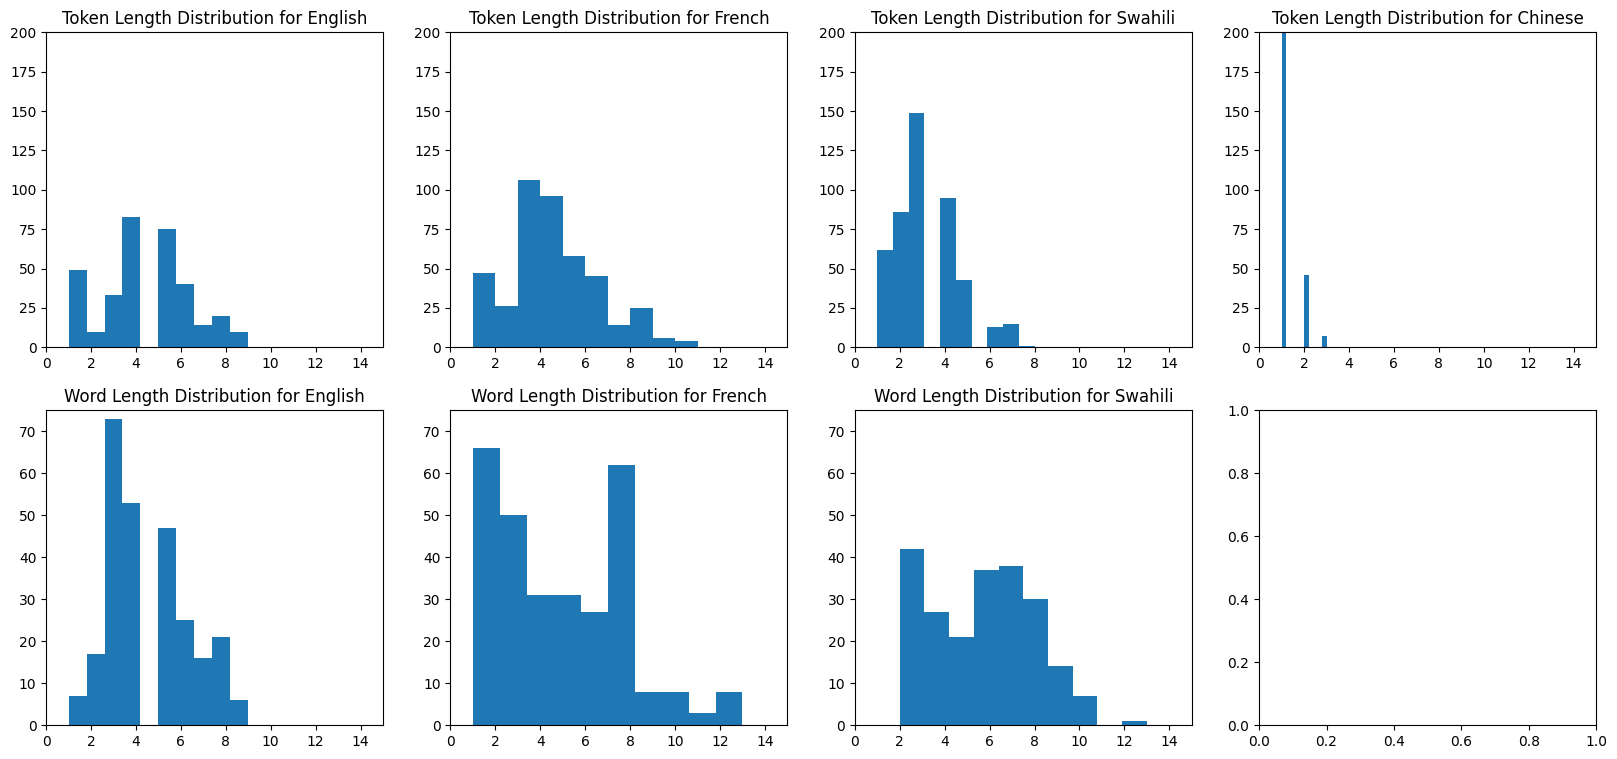

In [58]:
import matplotlib.pyplot as plt

def plot_token_length_histogram(text, language_name):
    encoding = tiktoken.encoding_for_model('gpt-4o')
    tokens = encoding.encode(text)

    decoded_tokens = [encoding.decode([t]) for t in tokens]
    token_lengths = [len(t) for t in decoded_tokens]
    plt.hist(token_lengths, bins=10)
    plt.title(f'Token Length Distribution for {language_name}')
    plt.xlim([0,15])
    plt.ylim([0,200])

def plot_word_length_histogram(text, language_name):
    if language != 'Chinese':
        word_lengths = [len(t) for t in text.split()]
        plt.hist(word_lengths, bins=10)
        plt.title(f'Word Length Distribution for {language_name}')
        plt.xlim([0,15])
        plt.ylim([0,75])

plt.figure(figsize=(20, 9))

for i, language in enumerate(['English', 'French', 'Swahili', 'Chinese']):
    # Token length histograms
    plt.subplot(2, 4, 1 + i)
    plot_token_length_histogram(excerpts[language], language)

    # Word length histograms
    plt.subplot(2, 4, 5 + i)
    plot_word_length_histogram(excerpts[language], language)


However, it's important to interpret these plots correctly:

1. Swahili tokens tend to be shorter than English tokens, even though words in Swahili are longer than English words. This may indicate that subword units in Swahili are less meaningful. Moreover, there are no length 5 tokens in Swahili, which mirrors the situation in English - also very suspicious.
2. French words tend to be significantly longer than English words, as well as the tokens.
3. With Chinese, situation is quite peculiar. It has no spaces between words, so plotting word length histogram would be meaningless. The tokens are very short, but it pretty well reflects the nature of the language: each character may have its own meaning in Chinese.

**Task 5.** Check how the tokenizer splits the Chinese text. You will find that some of the tokens are strange and have no clear correspondence in the text. Why do we have such tokens?

In [62]:
chinese_text = excerpts['Chinese']
tokens = encoding.encode(chinese_text)
tokens_decoded = [encoding.decode([t]) for t in tokens]
for t in tokens_decoded:
    print(t, ' - ', len(t.encode('utf-8')))


  -  1
從  -  3
前  -  3
，在  -  6
一  -  3
個  -  3
小  -  3
村  -  3
�  -  3
�  -  3
�  -  3
�  -  3
，  -  3
住  -  3
著  -  3
一些  -  6
善  -  3
良  -  3
的  -  3
農  -  3
夫  -  3
。他  -  6
們  -  3
每天  -  6
努力  -  6
工作  -  6
，  -  3
照  -  3
�  -  3
�  -  3
他  -  3
們  -  3
的  -  3
田  -  3
地  -  3
和  -  3
動  -  3
物  -  3
。  -  3
農  -  3
民  -  3
養  -  3
了  -  3
牛  -  3
、  -  3
雞  -  3
、  -  3
山  -  3
羊  -  3
和  -  3
一  -  3
�  -  3
�  -  3
名  -  3
叫  -  3
巴  -  3
迪  -  3
的  -  3
�  -  3
�  -  3
色  -  3
大  -  3
狗  -  3
。

  -  5
每天  -  6
早  -  3
上  -  3
，  -  3
農  -  3
民  -  3
們  -  3
都  -  3
早  -  3
早  -  3
起  -  3
床  -  3
。他  -  6
們  -  3
�  -  3
�  -  3
雞  -  3
，  -  3
雞  -  3
高  -  3
興  -  3
地  -  3
�  -  3
�  -  3
�  -  3
�  -  3
叫  -  3
。他  -  6
們  -  3
給  -  3
乳  -  3
牛  -  3
�  -  3
�  -  3
奶  -  3
，  -  3
乳  -  3
牛  -  3
給  -  3
它  -  3
們  -  3
新  -  3
�  -  3
�  -  3
、  -  3
甜  -  3
的  -  3
牛  -  3
奶  -  3
。  -  3
山  -  3
羊  -  3
們  -  3
喜  -  3
歡  -  3
跳  -  3
來  -  3
跳  -  3
去  -  3
，  - 

# Part 2 (ungraded). Exploring Gemini tokenization

You can't do much for free, but you can easily get the number of tokens in a sequence. So, we encourage you to experiment with the excerpts above and to check how Gemini tokenizers treat different languages.

Here is an example of using the token count function:

In [64]:
!pip install --upgrade google-cloud-aiplatform[tokenization]

zsh:1: no matches found: google-cloud-aiplatform[tokenization]


In [63]:
!pip show google-cloud-aiplatform

Name: google-cloud-aiplatform
Version: 1.71.1
Summary: Vertex AI API client library
Home-page: https://github.com/googleapis/python-aiplatform
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages
Requires: docstring-parser, google-api-core, google-auth, google-cloud-bigquery, google-cloud-resource-manager, google-cloud-storage, packaging, proto-plus, protobuf, pydantic, shapely
Required-by: 


In [65]:
from vertexai.preview import tokenization

model_name = "gemini-1.5-flash-001"
tokenizer = tokenization.get_tokenizer_for_model(model_name)

contents = "Jacques-Louis David was born into a prosperous French family in Paris on 30 August 1748."

print("Original sequence is: ", contents)

print("The number of tokens is: ", tokenizer.count_tokens(contents).total_tokens)

Original sequence is:  Jacques-Louis David was born into a prosperous French family in Paris on 30 August 1748.
The number of tokens is:  24


In [68]:
tokenizer.compute_tokens(contents)

PreviewComputeTokensResult(tokens_info=[TokensInfo(token_ids=[65861, 235290, 31032, 6046, 729, 7565, 1280, 476, 70848, 6987, 2730, 575, 7127, 611, 235248, 235304, 235276, 4826, 235248, 235274, 235324, 235310, 235321, 235265], tokens=[b'Jacques', b'-', b'Louis', b' David', b' was', b' born', b' into', b' a', b' prosperous', b' French', b' family', b' in', b' Paris', b' on', b' ', b'3', b'0', b' August', b' ', b'1', b'7', b'4', b'8', b'.'], role='user')])

This exercise comes with a solution:

In [69]:
for language in ['English', 'French', 'Swahili', 'Chinese']:
    print('{}: {} tokens'.format(language, tokenizer.count_tokens(excerpts[language]).total_tokens))

English: 331 tokens
French: 428 tokens
Swahili: 508 tokens
Chinese: 348 tokens


In [83]:
tokens = {lng: tokenizer.compute_tokens(text).tokens_info[0].token_ids for lng, text in excerpts.items()}

In [84]:
# Compute a matrix with count of overlapping token ids across languages
matrix = np.zeros((len(tokens), len(tokens)))
for lng1, tokens1 in tokens.items():
    for lng2, tokens2 in tokens.items():
        overlap = sum([t1 == t2 for t1, t2 in zip(tokens1, tokens2)])
        matrix[list(tokens.keys()).index(lng1), list(tokens.keys()).index(lng2)] = overlap

print(matrix)

[[331.   6.   2.   1.]
 [  6. 428.   1.   1.]
 [  2.   1. 508.   1.]
 [  1.   1.   1. 348.]]
